# Testing of Structure Learning Algorithms on Standardised vs Non-standardised Synthetic Data

This notebook is designed to test various structure learning algorithms on synthethic data that is non-standardised and compare the performance on synthethic data that is standardised.   

Standardisation is done via the process described in: https://arxiv.org/pdf/2406.11601 

In [1]:
import numpy as np
import pcalg
import networkx as nx
from conditional_independence import partial_correlation_suffstat, partial_correlation_test
from mcmc.mcmc import PartitionMCMC
from mcmc.data import SyntheticDataset
from mcmc.data.standardised_synthetic import Standardised_Synthetic_Data
from mcmc.proposals import PartitionProposal
from mcmc.scores import BGeScore
import pandas as pd
from mcmc.utils.graph_utils import plot_graph_from_adj_mat
from mcmc.mcmc import StructureMCMC
from mcmc.mcmc import MCMC
from mcmc.proposals import GraphProposal
from mcmc.utils.graph_utils import generate_key_from_adj_matrix
from collections import deque

### Generate Synthetic Data, both Standardised and Nonstandardised
The SyntheticDataset function within synthetic.py has been modified to take in a seed and standardised argument, to allow for standardised and non-standardised data creation. Below we create two different data sources from the same underlying DAG

Seed provided (type: <class 'int'>): 123
Seed provided (type: <class 'int'>): 123


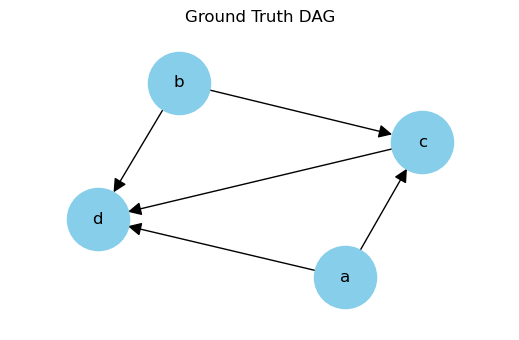

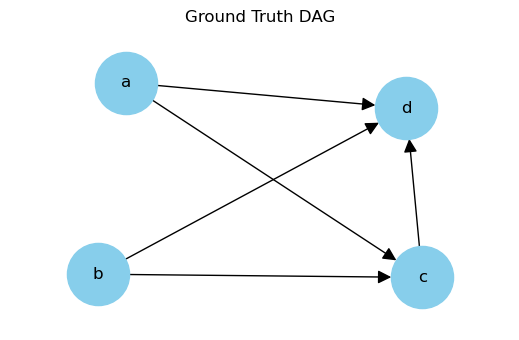

In [2]:
num_nodes = 4
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2
seed = 123

synthetic_data_std = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree, standardised=True, seed = seed)
synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree, standardised=False,seed = seed)

plot_graph_from_adj_mat(synthetic_data_std.adj_mat.values, node_labels, title="Ground Truth DAG")
plot_graph_from_adj_mat(synthetic_data.adj_mat.values, node_labels, title="Ground Truth DAG")

##### Confirming that each adjancency matrix is indeed equivalent

In [4]:
print(synthetic_data.adj_mat.equals(synthetic_data_std.adj_mat))
print('The Two Adjacency Matrices are Equivalent')

True
The Two Adjacency Matrices are Equivalent


##### Confirming that each dataset is indeed different

In [5]:
synthetic_data.data.equals(synthetic_data_std.data)

False

## Testing Structure Learning Algos on Each Dataset 

In [6]:
# Setup
np.random.seed(123)
n_iterations = 100000
# Running for Unstandardised Data
M = StructureMCMC(data=synthetic_data.data, max_iter=n_iterations)
# Running for Standardised Data
M_standardised = StructureMCMC(data = synthetic_data_std.data, max_iter= n_iterations)

Using default BGe score
Running PC algorithm
Using default BGe score
Running PC algorithm


In [7]:
# Unstandardised
mcmc_results, acceptance = M.run()
graphs = MCMC.get_graphs(self = M, results = mcmc_results)
key = generate_key_from_adj_matrix(synthetic_data.adj_mat.values)
keys, counts = np.unique([generate_key_from_adj_matrix(g) for g in graphs], return_counts=True)
print(key in keys)
print('Acceptance Ratio:', acceptance)

True
Acceptance Ratio: 0.19395


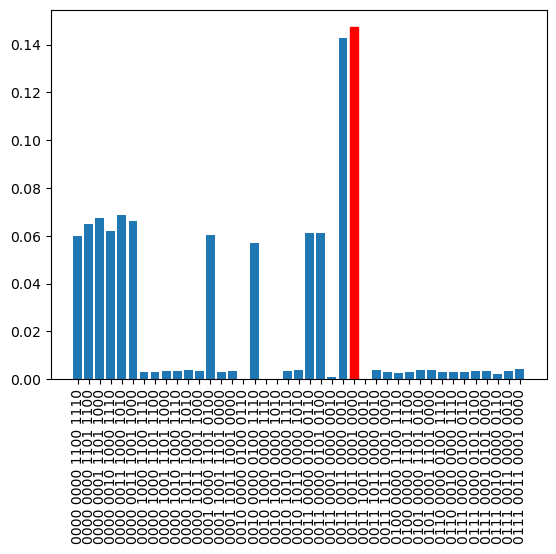

In [8]:
from matplotlib import pyplot as plt

bars = plt.bar(range(len(keys)), counts/len(graphs))
plt.xticks(range(len(keys)), keys, rotation=90)
bars[np.where(keys==key)[0][0]].set_color('red') 

In [9]:
# Standardised Data
mcmc_results_standardised, acceptance_standardised = M_standardised.run()
graphs_standardised = MCMC.get_graphs(self = M, results=mcmc_results_standardised)
key_standardised = generate_key_from_adj_matrix(synthetic_data_std.adj_mat.values)
keys_standardised, counts_standardised = np.unique([generate_key_from_adj_matrix(g) for g in graphs_standardised], return_counts = True)
print(key_standardised in keys_standardised)
print('Acceptance Ratio:', acceptance_standardised)

False
Acceptance Ratio: 0.30573


IndexError: index 0 is out of bounds for axis 0 with size 0

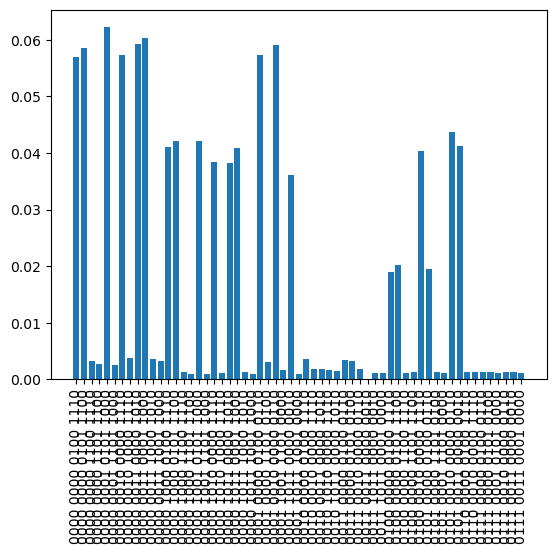

In [10]:
bars = plt.bar(range(len(keys_standardised)), counts_standardised/len(graphs_standardised))
plt.xticks(range(len(keys_standardised)), keys_standardised, rotation = 90) # Keep the x axis range the same so we can compare the two charts
bars[np.where(keys_standardised==key_standardised)[0][0]].set_color('red')